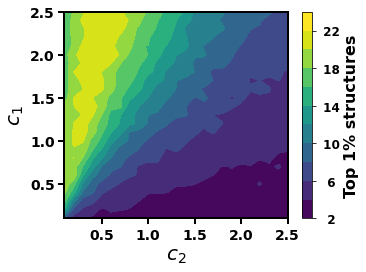

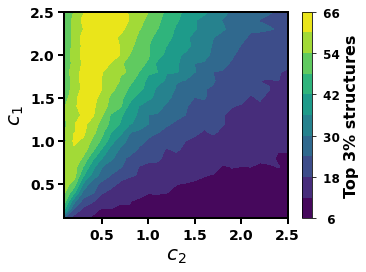

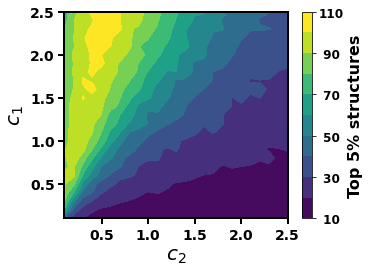

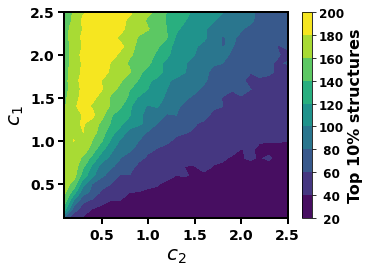

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

csv_ITC_name = [
    'mean0.01',#0.01
    'mean0.03',#0.03
    'mean0.05',#0.05
    'mean0.07',#0.07
]

accounts_ITC_list = [
    '1%',   #0.01
    '3%',   #0.03
    '5%',   #0.05
    '7%',   #0.07
]

csv_count_name = [
    'P0.01',
    'P0.03',
    'P0.05',
    'P0.1',
]

accounts_count_list = [
    '1%',
    '3%',  
    '5%', 
    '10%',
]

def csv2array(csv):

    csvname = csv + '.csv'
    df = pd.read_csv(csvname, index_col=0)
    shape = (int(df['w_index'].max()) + 1, int(df['c1_index'].max()) + 1, int(df['c2_index'].max()) + 1)
    array_3d = np.zeros(shape, dtype=float)
    for index, row in df.iterrows():
        array_3d[int(row['w_index']), int(row['c1_index']), int(row['c2_index'])] = row['ITC']
        
    return array_3d

def mean_sounts_plot(index, array_3d):
    
    accounts = accounts_count_list[index]
    sub_array = array_3d[8:10, :, :]
    mean_values = np.mean(sub_array, axis=0)/50
    
    plt.figure(figsize=(5, 3.8))
    plt.contourf(mean_values, cmap='viridis', levels=10)
    plt.clim(vmin=mean_values.min(), vmax=mean_values.max())
    cbar = plt.colorbar() 
    tick_labels = [str('{: >3}'.format(int(tick))) for tick in cbar.get_ticks()]

    cbar.set_ticklabels(tick_labels)
    cbar.ax.set_yticklabels(tick_labels, fontsize=12, fontweight='bold')
    cbar.set_label('Top '+accounts+' structures', fontsize=16, fontweight='bold') 
    
    plt.xticks([4,9,14,19,24], ['0.5','1.0','1.5','2.0','2.5'], fontsize=14, fontweight='bold')
    plt.yticks([4,9,14,19,24], ['0.5','1.0','1.5','2.0','2.5'], fontsize=14, fontweight='bold')
    
    plt.gca().spines['top'].set_linewidth(2)
    plt.gca().spines['right'].set_linewidth(2)
    plt.gca().spines['bottom'].set_linewidth(2)
    plt.gca().spines['left'].set_linewidth(2)

    plt.tick_params(axis='both', which='major', width=2, length=6)
    plt.xlabel(r'$\mathregular{\mathit{c}}_{\mathit{2}}$', fontsize=20, fontweight='bold')
    plt.ylabel(r'$\mathregular{\mathit{c}}_{\mathit{1}}$', fontsize=20, fontweight='bold')
    
    jpgname = str(index+1) + 'local.jpg'
    plt.savefig(jpgname, dpi=500, bbox_inches='tight', pad_inches=0.1)
    
    plt.show()
    

for index, csv in enumerate(csv_count_name):
    mean_sounts_plot(index,csv2array(csv))